In [8]:
# 5.	From Section 15.1 of the Book: Using the code that we implemented above, implement code that 
# finds two threshold values to segment the brain slice into three different segments. Does this 
# adequately separate the ventricles from other brain tissue based on their intensity? Compare 
# the Dice and IoU score of your implementation to the results of Scikit Image’s 
# skimage.filters.threshold_multiotsu. (2.5’)

# from textbook 
from ndslib import load_data
brain = load_data("bold_volume")

slice10 = brain[:, :, 10]
import matplotlib.pyplot as plt
import numpy as np




256.0
617.0


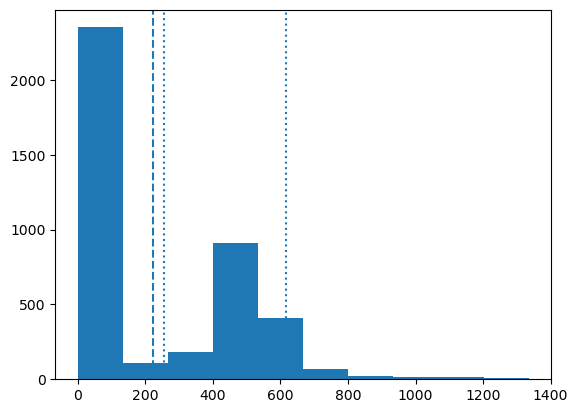

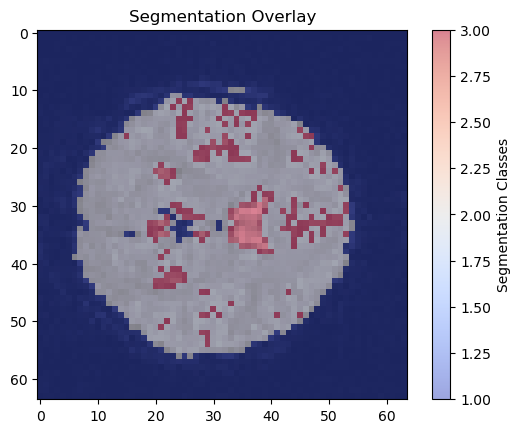

In [23]:
min_intraclass_variance = np.inf

for candidate1 in np.unique(slice10):
    ventricles = slice10[slice10 < candidate1]
    for candidate2 in np.unique(slice10):
        tissue = slice10[(slice10 >= candidate1) & (slice10 < candidate2)]
        background = slice10[slice10 >= candidate2]
        
        # Ensure each category has elements
        if len(ventricles) and len(tissue) and len(background):
            # Calculate weighted variances
            ventricles_variance = np.var(ventricles) * len(ventricles)
            tissue_variance =  np.var(tissue) * len(tissue)
            background_variance = np.var(background) * len(background)
            
            # Sum variances to get intraclass variance
            intraclass_variance = ventricles_variance + tissue_variance + background_variance
            
            # Update the minimum intraclass variance if it's better 
            if intraclass_variance < min_intraclass_variance:
                min_intraclass_variance = intraclass_variance
                threshold1 = candidate1
                threshold2 = candidate2
            
print(threshold1)
print(threshold2)

mean = np.mean(slice10)
fig, ax = plt.subplots()
ax.hist(slice10.flat)
ax.axvline(mean, linestyle='dashed')
ax.axvline(threshold1, linestyle = 'dotted')
p = ax.axvline(threshold2, linestyle='dotted')

# Compute segmentations
segmentation1 = np.zeros_like(slice10)
segmentation1[slice10 < threshold1] = 1  # Ventricles
segmentation1[(slice10 >= threshold1) & (slice10 < threshold2)] = 2  # Tissue
segmentation1[slice10 >= threshold2] = 3  # Background

# Plotting the segmented regions with distinct colors
fig, ax = plt.subplots()
ax.imshow(slice10, cmap="bone")  # Base image in grayscale
p = ax.imshow(segmentation1, cmap="coolwarm", alpha=0.5)  # Overlay segmentation with color
fig.colorbar(p, ax=ax, label="Segmentation Classes")  # Optional: Add colorbar
plt.title("Segmentation Overlay")
plt.show()

[252.91992188 623.17382812]


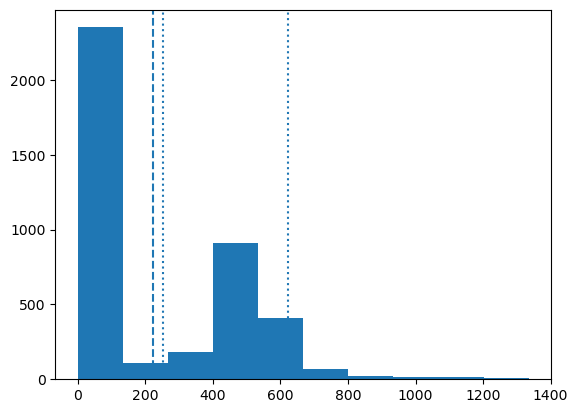

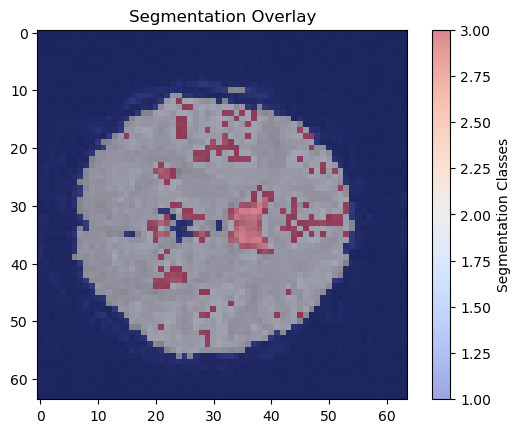

In [24]:
# Implement scikit package multiotsu instead for comparison 
from skimage.filters import threshold_multiotsu  
thresholds = threshold_multiotsu(slice10, classes=3) 
print(thresholds)

mean = np.mean(slice10)
fig, ax = plt.subplots()
ax.hist(slice10.flat)
ax.axvline(mean, linestyle='dashed')
ax.axvline(thresholds[0], linestyle = 'dotted')
p = ax.axvline(thresholds[1], linestyle='dotted')

# Compute segmentations
segmentation2 = np.zeros_like(slice10)
segmentation2[slice10 < thresholds[0]] = 1  # Ventricles
segmentation2[(slice10 >= thresholds[0]) & (slice10 < thresholds[1])] = 2  # Tissue
segmentation2[slice10 >= thresholds[1]] = 3  # Background

fig, ax = plt.subplots()
ax.imshow(slice10, cmap="bone")  # Base image in grayscale
p = ax.imshow(segmentation2, cmap="coolwarm", alpha=0.5)  # Overlay segmentation with color
fig.colorbar(p, ax=ax, label="Segmentation Classes")  # Optional: Add colorbar
plt.title("Segmentation Overlay")
plt.show()

In [27]:
# test performance


# comparing segmentation1 and segmentation 2

#dice coefficient
intersection = np.sum(segmentation1== segmentation2)
total_pixels = segmentation1.size + segmentation2.size

dice = (2 * intersection) / total_pixels
print(f"Generalized Dice Coefficient: {dice:.4f}")


#IoU score 
union = segmentation1.size

iou = intersection / union
print(f"Generalized IoU: {iou:.4f}")

# Both go from a range of 0 to 1, with 1 being perfect overlap. They have a high degree of overlap 
# I think this is what the homework is asking for? I did not find ground truth documentation of this package data

Generalized Dice Coefficient: 0.9941
Generalized IoU: 0.9941


In [ ]:
# just extra 
from skimage.filters import try_all_threshold
try_all_threshold(slice10)